In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

from power_laws import *

In [2]:
# load the merged dataset of placental mammals 
# i.e. leaving out marsupials and monotremes,
# which are not commonly used as livestock.
mammals_df = pd.read_csv('../data/merged_animal_traits_placental_only.csv', index_col=0)

# Load the cleaned data from the UN FAO DAD-IS DB. 
# See 0_preprocess_FAO_data.ipynb for the mild cleanup logic
#  - mostly dropping empty rows, replacing values with NaN. 
# Domestic Animal Diversity Information System (DAD-IS)
dad_is_df = pd.read_csv('../data/010522_FAO_DAD-IS_cleaned.csv')

/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (13,14,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
mammals_df.columns

Index(['Order', 'Family', 'Genus', 'Species', 'PlacentalMammal',
       'AdultBodyMass (g)', 'NeonateBodyMass (g)', 'LitterSize (number)',
       'GestationLen (d)', 'InterbirthInterval (d)', 'LittersPerYear (number)',
       'WeaningAge (d)', 'WeaningBodyMass (g)', 'FemaleSexualMaturity (d)',
       'MaleSexualMaturity (d)', 'PantheriaSexualMaturity (d)',
       'AgeAtFirstBirth (d)', 'MaxLongevity (m)', 'BasalMetabolicRate (W)',
       'BasalMetabolicRate (mLO2hr)', 'BasalMetabolicRate (g)', 'RefsAnAge',
       'RefsPanTHERIA', 'BinomialName', 'YoungPerYear_Litters (number)',
       'YoungPerYear_Interval (number)', 'YoungPerYear_Estimated (number)',
       'YoungMassPerYear_Estimated (g)', 'Order_savage04', 'Family_savage04',
       'mass_g', 'BMR_W', 'BMR_MJ_per_day', 'species_average_mass_g',
       'species_average_BMR_W', 'species_average_BMR_MJ_per_day', 'ref'],
      dtype='object')

In [4]:
dad_is_df.columns.values

array(['Unnamed: 0', 'Country', 'ISO3', 'Specie',
       'Breed/Most common name', 'Language', 'Description',
       'Transboundary name', 'Other name', 'Provision Uses',
       'Regulation and Maintenance Uses', 'Cultural Uses',
       'Description Of Specific Uses',
       'Production environment/management systems',
       'Literature related to uses and ecosystem services',
       'Additional information', 'Additional information comments',
       'Efabis cultural role comment', 'Efabis cultural value',
       'Adaptability to specific environment',
       'Specific resistance or tolerance',
       'Specific reproductive characteristic',
       'Special characteristic of product', 'Other special qualities',
       'Reference for special qualities', 'Efabis genetic features',
       'Efabis environmental role',
       'Efabis adaptability to marginal land', 'Body conformation',
       'Coat description', 'Coat quality', 'Comb type', 'Skin colour',
       'Shank and foot colour', 'Pl

No handles with labels found to put in legend.


BMR_W ~ 0.021 (mass)^(0.715); R = 0.968
RMSE = 0.425 (1.53 fold)
MAPE = 0.336
sigma*(Y) = 5.383 fold

NeonateBodyMass (g) ~ 0.085 (mass)^(0.947); R = 0.980
RMSE = 0.700 (2.01 fold)
MAPE = 0.757
sigma*(Y) = 32.200 fold
Livestock RMSE = 0.672 (1.96 fold)
Livestock MAPE = 0.774
Livestock sigma*(Y) = 3.614 fold

LitterSize (number) ~ 2.595 (mass)^(-0.029); R = -0.141
RMSE = 0.741 (2.10 fold)
MAPE = 0.620
sigma*(Y) = 2.114 fold
Livestock RMSE = 0.844 (2.33 fold)
Livestock MAPE = 0.573
Livestock sigma*(Y) = 2.318 fold



No handles with labels found to put in legend.
No handles with labels found to put in legend.


InterbirthInterval (d) ~ 30.234 (mass)^(0.203); R = 0.751
RMSE = 0.623 (1.86 fold)
MAPE = 0.504
sigma*(Y) = 2.568 fold
Livestock RMSE = 0.360 (1.43 fold)
Livestock MAPE = 0.329
Livestock sigma*(Y) = 1.454 fold

YoungPerYear_Estimated (number) ~ 0.904 (mass)^(0.071); R = 0.272
RMSE = 0.882 (2.41 fold)
MAPE = 0.754
sigma*(Y) = 2.499 fold
Livestock RMSE = 1.048 (2.85 fold)
Livestock MAPE = 0.755
Livestock sigma*(Y) = 2.808 fold

YoungMassPerYear_Estimated (g) ~ 0.080 (mass)^(0.998); R = 0.981
RMSE = 0.725 (2.07 fold)
MAPE = 0.689
sigma*(Y) = 41.689 fold
Livestock RMSE = 0.575 (1.78 fold)
Livestock MAPE = 0.472
Livestock sigma*(Y) = 2.383 fold

GestationLen (d) ~ 17.679 (mass)^(0.206); R = 0.649
RMSE = 0.658 (1.93 fold)
MAPE = 0.565
sigma*(Y) = 2.371 fold

WeaningBodyMass (g) ~ 0.590 (mass)^(0.907); R = 0.981
RMSE = 0.489 (1.63 fold)
MAPE = 0.416
sigma*(Y) = 12.636 fold



No handles with labels found to put in legend.
No handles with labels found to put in legend.


MaleSexualMaturity (d) ~ 88.782 (mass)^(0.122); R = 0.501
RMSE = 0.645 (1.91 fold)
MAPE = 0.559
sigma*(Y) = 2.106 fold
Livestock RMSE = 0.478 (1.61 fold)
Livestock MAPE = 0.466
Livestock sigma*(Y) = 1.657 fold

FemaleSexualMaturity (d) ~ 69.944 (mass)^(0.147); R = 0.612
RMSE = 0.642 (1.90 fold)
MAPE = 0.556
sigma*(Y) = 2.250 fold
Livestock RMSE = 0.477 (1.61 fold)
Livestock MAPE = 0.465
Livestock sigma*(Y) = 1.666 fold

AgeAtFirstBirth (d) ~ 90.713 (mass)^(0.171); R = 0.701
RMSE = 0.580 (1.79 fold)
MAPE = 0.471
sigma*(Y) = 2.254 fold
Livestock RMSE = 0.391 (1.48 fold)
Livestock MAPE = 0.353
Livestock sigma*(Y) = 1.580 fold

MaxLongevity (m) ~ 30.775 (mass)^(0.213); R = 0.672
RMSE = 0.666 (1.95 fold)
MAPE = 0.655
sigma*(Y) = 2.455 fold



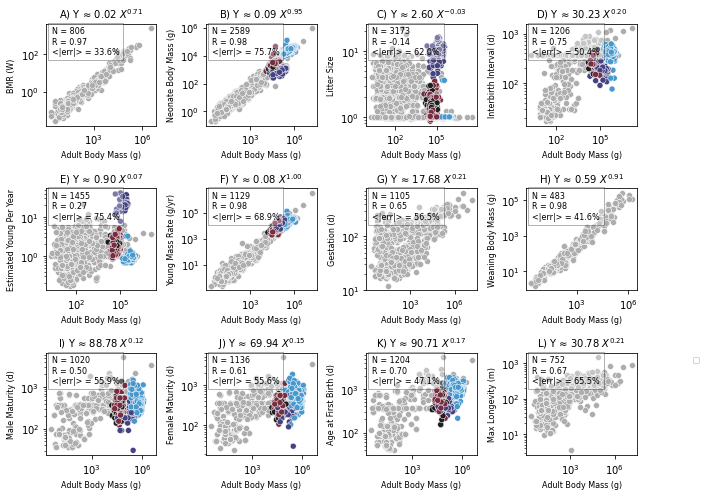

In [6]:
cols2plot_mammals = ['BMR_W', 'NeonateBodyMass (g)', 'LitterSize (number)', 'InterbirthInterval (d)',
                     'YoungPerYear_Estimated (number)', 'YoungMassPerYear_Estimated (g)', 'GestationLen (d)', 'WeaningBodyMass (g)',
                     'MaleSexualMaturity (d)', 'FemaleSexualMaturity (d)', 'AgeAtFirstBirth (d)', 'MaxLongevity (m)']
cols2plot_dad_is = [None, 'Birth weight AVG (g)', 'Litter size AVG', 'Parturition interval (day) AVG',
                    'Young per year AVG (number)', 'Young mass per year AVG (g)', None, None,
                    'Age maturity males (day)', 'Age maturity females (day)', 'Age first parturition (day) AVG', None]

pretty_names_mammals = ['BMR (W)', 'Neonate Body Mass (g)', 'Litter Size',
                        'Interbirth Interval (d)', 'Estimated Young Per Year', 'Young Mass Rate (g/yr)',
                        'Gestation (d)', 'Weaning Body Mass (g)', 'Male Maturity (d)', 'Female Maturity (d)',
                        'Age at First Birth (d)', 'Max Longevity (m)']
panel_labels = 'ABCDEFGHIJKL'
dad_is_species2plot = 'Cattle,Pig,Goat,Sheep'.split(',')
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(10,7))
flat_axs = axs.flatten()
greys = sns.color_palette('Greys')
pal = sns.color_palette('icefire', n_colors=5)
my_pal = dict(zip(dad_is_species2plot,pal))

# TODO: should we be using body mass data from Savage '04 where possible?
# What about species average body mass? Decide what to do here. 
xcol_mammals = 'AdultBodyMass (g)'
xcol_dad_is = 'Adult weight AVG (g)'
for i, (my_ax, ycol_mammals) in enumerate(zip(flat_axs, cols2plot_mammals)):
    plt.sca(my_ax)
    plt.xscale('log')
    plt.yscale('log')
    
    mask = np.logical_and(mammals_df[xcol_mammals] > 0,
                          mammals_df[ycol_mammals] > 0)
    sub_df = mammals_df[mask]
    sns.scatterplot(data=sub_df, x=xcol_mammals, y=ycol_mammals, legend=False,
                    color=greys[2])
    
    x_data = sub_df[xcol_mammals].values
    y_data = sub_df[ycol_mammals].values
    
    ycol_dad_is = cols2plot_dad_is[i]
    if ycol_dad_is:
        mask = np.logical_and(dad_is_df[xcol_dad_is] > 0,
                              dad_is_df[ycol_dad_is] > 0)
        mask = np.logical_and(mask, dad_is_df.Specie.isin(dad_is_species2plot))
        sub_df = dad_is_df[mask]
        sns.scatterplot(data=sub_df, x=xcol_dad_is, y=ycol_dad_is, hue='Specie',
                        palette=my_pal)
        
        x_data_livestock = sub_df[xcol_dad_is].values
        y_data_livestock = sub_df[ycol_dad_is].values
    
        x_data = np.concatenate([x_data, x_data_livestock])
        y_data = np.concatenate([y_data, y_data_livestock])
    
    exponent, prefactor, r = fit_power_law_odr(np.log(x_data), np.log(y_data))
    print('{0} ~ {1:.3f} (mass)^({2:.3f}); R = {3:.3f}'.format(ycol_mammals, prefactor, exponent, r))
    plt.title('{0}) Y ≈ {1:.2f} $X^{{{2:.2f}}}$'.format(panel_labels[i], prefactor, exponent),
              fontsize=10)

    sigstar = sigma_star(y_data)
    pred_ys = prefactor * np.power(x_data, exponent)
    rmse = mean_squared_error(np.log(y_data), np.log(pred_ys), squared=False)
    mape = mean_absolute_percentage_error(y_data, pred_ys)
    print('RMSE = {0:.3f} ({1:.2f} fold)'.format(rmse, np.exp(rmse)))
    print('MAPE = {0:.3f}'.format(mape))
    print('sigma*(Y) = {0:.3f} fold'.format(sigstar))

    if ycol_dad_is:
        pred_ys_livestock = prefactor * np.power(x_data_livestock, exponent)
        rmse_livestock = mean_squared_error(np.log(y_data_livestock), np.log(pred_ys_livestock), squared=False)
        mape_livestock = mean_absolute_percentage_error(y_data_livestock, pred_ys_livestock)
        sigstar_livestock = sigma_star(y_data_livestock)
        print('Livestock RMSE = {0:.3f} ({1:.2f} fold)'.format(rmse_livestock, np.exp(rmse_livestock)))
        print('Livestock MAPE = {0:.3f}'.format(mape_livestock))
        print('Livestock sigma*(Y) = {0:.3f} fold'.format(sigstar_livestock))
    print()
    
    # Calculate pearson correlation of combined log-transformed data
    r_val = pearsonr(np.log10(x_data), np.log10(y_data))
    N_obs = x_data.size
    s = 'N = {0:d}\nR = {1:.2f}\n<|err|> = {2:.1f}%'.format(
        N_obs, r_val[0], mape*100)
    t = plt.text(0.05, 0.7, s,
                 transform=my_ax.transAxes, fontsize=8)
    t.set_bbox(dict(facecolor='w', alpha=0.3, edgecolor='k'))        

    plt.legend().set_visible(False)
    plt.xlabel('Adult Body Mass (g)', fontsize=8)
    plt.ylabel(pretty_names_mammals[i], fontsize=8)

plt.legend(fontsize=8, loc=1, bbox_to_anchor=(1.6, 1)).set_visible(True)

plt.tight_layout()
plt.savefig('../figures/merged_allometries.png', dpi=600, facecolor='w')
plt.show()

# Plot the tradeoff as a function of mother size. 
Note that one watt = J/s = (1e-3 kJ/J) * (8.64e5 s/day) = 86.4 kJ/day = 20.65 kCal/day

Following Thomson & Nicoll Nature 1986, it seems that pregnancy has a modest effect on BMR (less than 2-fold) when integrated over the whole gestational period through to weaning. This can be seen in their figure 1

In [ ]:
adult_body_mass_g = np.logspace(3, 6, 100)
# predict BMR from the fit above for now.
# TODO: use the 0.75 exponent once I fully understand the arguments for/against
pred_bmr_w = 0.02 * np.power(adult_body_mass_g, 0.71) 
pred_bmr_daily_kcal = pred_bmr_w * 20.65

pred_young_mass_rate = 0.08*adult_body_mass_g

In [ ]:
plt.figure()
pal = sns.color_palette('Blues_r')

# Basal metabolism of 100 mothers
for i, k in enumerate([0.5, 1.0, 2.0, 4.0, 8.0]):
    c = pal[i]
    bmr_cost_per_g = pred_bmr_daily_kcal/(k*adult_body_mass_g)
    bmr_cost_per_kg = bmr_cost_per_g*1000
    plt.loglog(adult_body_mass_g/1000, bmr_cost_per_kg,
               label='$\kappa$ = {0:.1f}'.format(k), color=c)

plt.legend()
plt.xlabel('Adult Body Mass (kg)')
plt.ylabel('Basal Metabolic Cost (kCal/day/kg meat)')

plt.show()